In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# 1. Loading the data as Dataframe

In [2]:
train_set = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_set = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
sample = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")

# Have a look, what it look like!

In [3]:
train_set.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_set.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
sample.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [6]:
x = train_set["text"]
y = train_set["target"]
print(np.shape(y))


x_test = test_set["text"]

(7613,)


In [7]:
x.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(x)

x_index = tokenizer.word_index
sequence = tokenizer.texts_to_sequences(x)
x_padded = pad_sequences(sequence)

In [10]:
test_sequence = tokenizer.texts_to_sequences(x_test)
x_test_padded = pad_sequences(test_sequence)

In [11]:
print(type(x_index))
print(type(sequence))
print(type(x_padded))

<class 'dict'>
<class 'list'>
<class 'numpy.ndarray'>


In [12]:
print(np.shape(x_padded))
print(len(x_index))

(7613, 32)
22700


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length = 10),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [14]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_padded, y, validation_split=0.33, epochs=10)

Epoch 1/10
160/160 [==============================] - 2s 10ms/step - loss: 0.6706 - accuracy: 0.5863 - val_loss: 0.5863 - val_accuracy: 0.7111
Epoch 2/10
160/160 [==============================] - 1s 7ms/step - loss: 0.4957 - accuracy: 0.7981 - val_loss: 0.4952 - val_accuracy: 0.7768
Epoch 3/10
160/160 [==============================] - 1s 7ms/step - loss: 0.3553 - accuracy: 0.8620 - val_loss: 0.4729 - val_accuracy: 0.7883
Epoch 4/10
160/160 [==============================] - 1s 7ms/step - loss: 0.2610 - accuracy: 0.9030 - val_loss: 0.5029 - val_accuracy: 0.7569
Epoch 5/10
160/160 [==============================] - 1s 7ms/step - loss: 0.2073 - accuracy: 0.9285 - val_loss: 0.5200 - val_accuracy: 0.7732
Epoch 6/10
160/160 [==============================] - 1s 7ms/step - loss: 0.1567 - accuracy: 0.9431 - val_loss: 0.5616 - val_accuracy: 0.7553
Epoch 7/10
160/160 [==============================] - 1s 7ms/step - loss: 0.1263 - accuracy: 0.9577 - val_loss: 0.6332 - val_accuracy: 0.7593
Epoch

In [15]:
import matplotlib.pyplot as plt

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


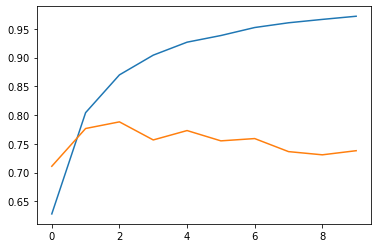

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

In [17]:
predictions = model.predict(x_test_padded)
predictions = predictions.flatten()
print(predictions)
print(np.shape(predictions))

[0.2808717  0.99228907 0.99827164 ... 0.9948033  0.97451985 0.9859411 ]
(3263,)


In [18]:
predictions = (predictions>=.5)

In [19]:
predictions = predictions.astype(int)
print(predictions)

[0 1 1 ... 1 1 1]


In [20]:
print(type(predictions))

<class 'numpy.ndarray'>


In [21]:
output = pd.DataFrame({'id': test_set.id, 'target': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
